In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

music_data = pd.read_csv("Resources/top10s.csv", encoding = "ISO-8859-1")

In [98]:
music_df = pd.DataFrame(music_data)
music_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [99]:
columns = {"title": "Title", "artist": "Artist", "top genre": "Top Genre", "year": "Year", "bpm": "Beats per Minute (BPM)", 
           "nrgy": "Energy", "dnce": "Danceability", "dB": "Loudness (dB)", "live": "Liveness", "val": "Valence", 
           "dur": "Duration (sec)", "acous": "Acousticness", "spch": "Speechiness", "pop": "Popularity"}

clean_music_df = music_df.rename(columns = columns)
clean_music_df.head()

,Unnamed: 0,Title,Artist,Top Genre,Year,Beats per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Duration (sec),Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [100]:
music_subset_data_df=pd.DataFrame(clean_music_df,columns=['Title','Artist','Year','Energy',
                                                          'Danceability','Valence','Popularity'])
music_subset_data_df.head()

,Title,Artist,Year,Energy,Danceability,Valence,Popularity
0,"Hey, Soul Sister",Train,2010,89,67,80,83
1,Love The Way You Lie,Eminem,2010,93,75,64,82
2,TiK ToK,Kesha,2010,84,76,71,80
3,Bad Romance,Lady Gaga,2010,92,70,71,79
4,Just the Way You Are,Bruno Mars,2010,84,64,43,78


In [101]:
avg_music_data_by_year_df=music_subset_data_df.groupby('Year').mean()
avg_music_data_by_year_df

,Energy,Danceability,Valence,Popularity
Year,,,,
2010,77.901961,64.529412,57.000000,64.254902
2011,74.886792,63.641509,53.698113,61.867925
2012,75.485714,65.714286,64.171429,67.771429
2013,73.873239,62.042254,53.183099,63.985915
2014,67.775862,62.534483,52.086207,62.706897
2015,70.336842,63.663158,52.526316,64.568421
2016,67.237500,63.325000,45.150000,64.162500
2017,69.169231,65.369231,52.276923,69.015385
2018,65.468750,67.203125,48.765625,72.437500


In [102]:
music_genre_group = clean_music_df.groupby("Top Genre")
genre_count = music_genre_group["Top Genre"].count()
result = genre_count.rename('Count').reset_index()
genre_count_df = pd.DataFrame(result)
genre_count_df.head()

,Top Genre,Count
0,acoustic pop,2
1,alaska indie,1
2,alternative r&b,1
3,art pop,8
4,atl hip hop,5


,Top Genre,Count
0,dance pop,327
1,pop,60
2,canadian pop,34
3,boy band,15
4,barbadian pop,15
5,electropop,13
6,british soul,11
7,big room,10
8,canadian contemporary r&b,9
9,neo mellow,9


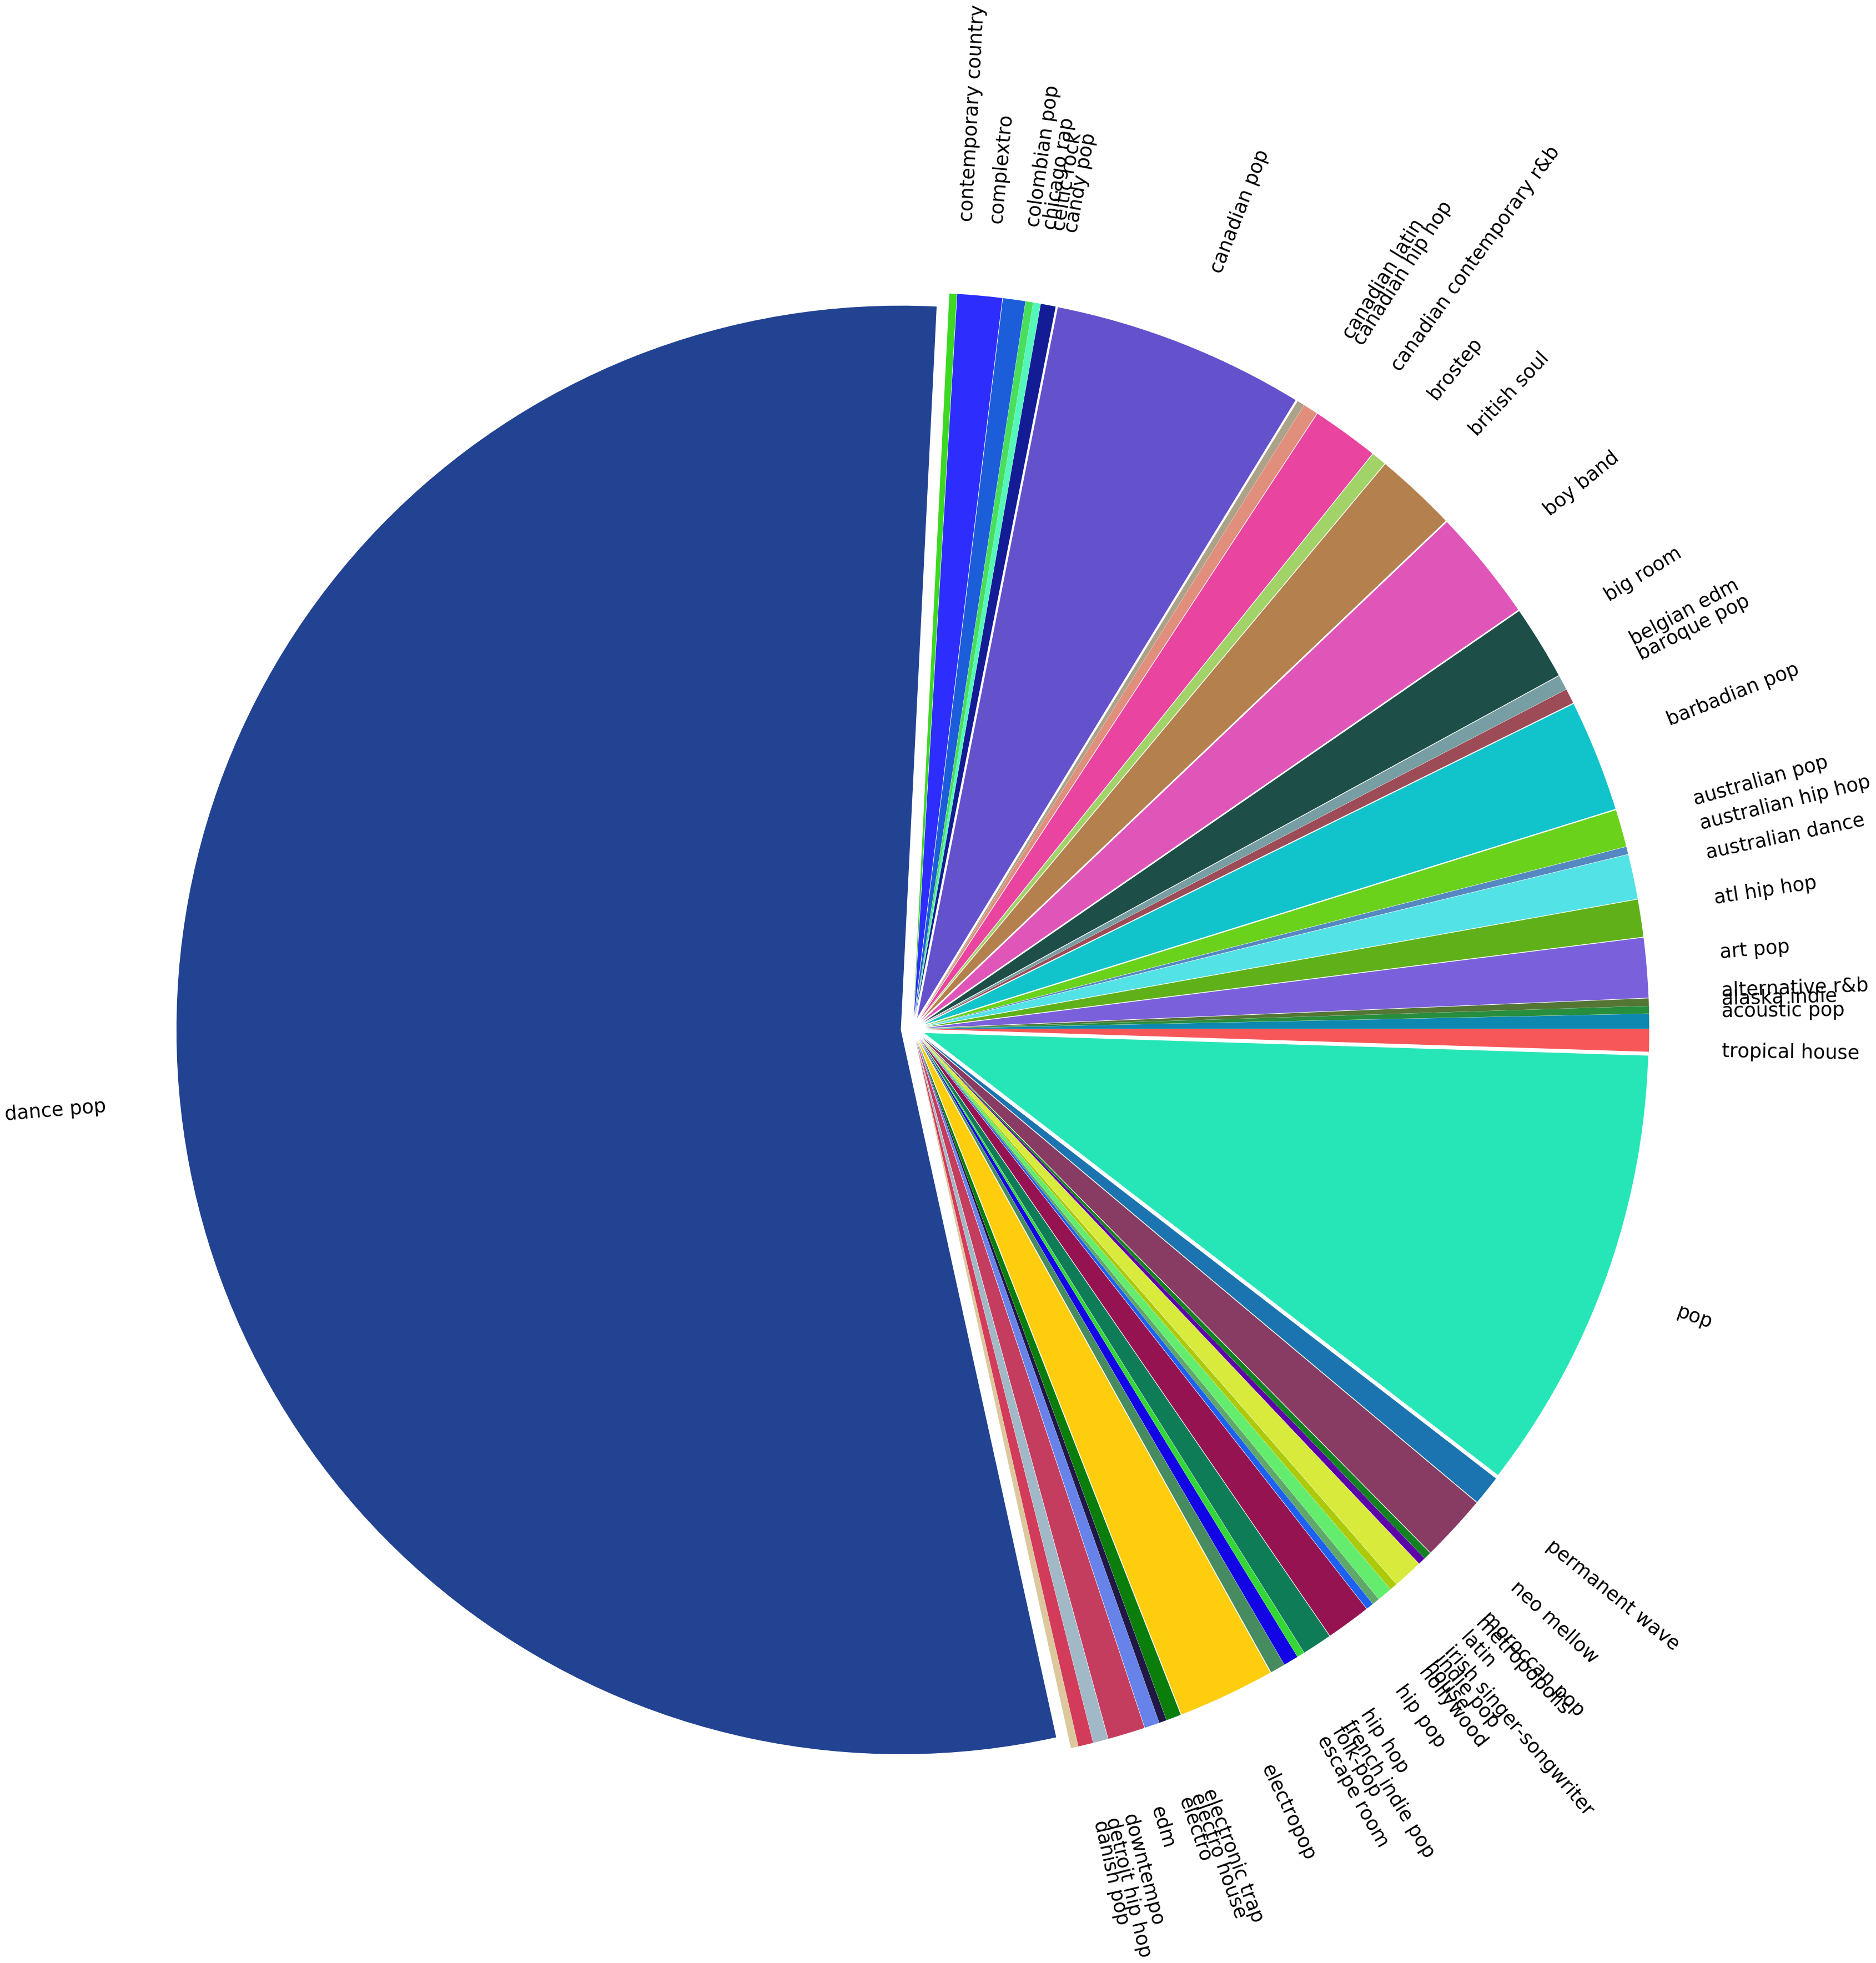

In [103]:
sort_genre_df = genre_count_df.sort_values('Count', ascending=False)
labels = genre_count_df["Top Genre"]
sizes = genre_count_df["Count"]
explode = []
colors = []
index_genre_df = sort_genre_df.reset_index()
index_genre_df = pd.DataFrame(index_genre_df, columns = ["Top Genre", "Count"])
i=0
for i in (index_genre_df.index):
    explode.append(0.25)
num_colors = len(index_genre_df)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]

plt.pie(x=sizes, explode = explode, labels = labels, colors = colors, radius = 15.0, 
        textprops={'fontsize': 35}, rotatelabels = True)

index_genre_df

In [115]:
clean_music_df['Top Genre'] = clean_music_df['Top Genre'].replace(
    {"acoustic pop":"pop","art pop":"pop","australian pop":"pop","barbadian pop":"pop","baroque pop":"pop",
     "canadian pop":"pop","candy pop":"pop","colombian pop":"pop","dance pop":"pop","danish pop":"pop","electropop":"pop",
     "folk-pop":"pop","french indie pop":"pop","hip pop":"pop","indie pop":"pop","moroccan pop":"pop",'alaska indie': "other", 
     'alternative r&b': 'r&b', 'atl hip hop': 'hip hop','australian dance': 'other', 'australian hip hop': 'other', 
     'belgian edm': 'other','big room': 'other', 'boy band': 'other', 'british soul': 'other', 'brostep': 'other',
     'canadian contemporary r&b': 'r&b', 'canadian hip hop': 'hip hop', 'canadian latin': 'other','celtic rock': 'other', 
     'chicago rap': 'other', 'complextro': 'other', 'contemporary country': 'other','detroit hip hop': 'hip hop', 
     'downtempo': 'other', 'edm': 'other', 'electro': 'other', 'electro house': 'other','electronic trap': 'other', 
     'escape room': 'other', 'hip hop': 'hip hop', 'hollywood': 'other', 'house': 'other','irish singer-songwriter': 'other', 
     'latin': 'other', 'metropopolis': 'other', 'neo mellow': 'other','permanent wave': 'other', 'tropical house': 'other'})
pop_music_df = clean_music_df

pop_genre_group = pop_music_df.groupby("Top Genre")
pop_genre_count = pop_genre_group["Top Genre"].count()
pop_result = pop_genre_count.rename('Count').reset_index()
pop_genre_count_df = pd.DataFrame(pop_result)
pop_genre_count_df


,Top Genre,Count
0,hip hop,13
1,other,96
2,pop,484
3,r&b,10


([<matplotlib.patches.Wedge at 0x24f5e90d240>,
 [Text(2.194955960789906, 0.14889032941350452, 'hip hop'),
  Text(1.7703581883640567, 1.3060749920629884, 'other'),
  Text(-2.000784786330515, -1.1343986242888153, 'pop'),
  Text(2.197014872419102, -0.11456723078296338, 'r&b')],
 [Text(1.197248705885403, 0.08121290695282064, '2.2%'),
  Text(0.965649920925849, 0.7124045411252663, '15.9%'),
  Text(-1.1308783574911603, -0.6411818311197651, '80.3%'),
  Text(1.1983717485922374, -0.062491216790707294, '1.7%')])

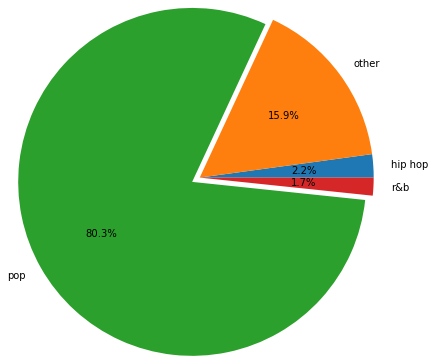

In [125]:
labels = ['hip hop', 'other', 'pop', 'r&b']
sizes = [13,96,484,10]
explode = [0,0,.1,0]

plt.pie(x=sizes, labels = labels, explode = explode, autopct='%1.1f%%', radius = 2.0)